In [1]:
# Install required packages
%pip install scipy
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   --------------- ------------------------ 4.2/10.7 MB 28.2 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
Note: you may need to restart the kernel to use updated packages.


In [33]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci

In [35]:
# -- model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score

# -- pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Reading Data Into Notebook

In [36]:
data_2015 = pd.read_csv(r"C:\Users\Nik\OneDrive\Coding_Analysis\Coding Practice\Baseball Personal Projects\pitching data\pitching_data_2015.csv")
data_2015.head()

,"last_name, first_name",player_id,year,player_age,p_game,p_formatted_ip,pa,k_percent,bb_percent,xba,...,fo_avg_break_z,fo_avg_break,fo_range_speed,n_sc_formatted,sc_avg_speed,sc_avg_spin,sc_avg_break_x,sc_avg_break_z,sc_avg_break,sc_range_speed
0,"Geltz, Steve",544993,2015,27,70,67.1,268,22.8,9.7,0.205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Contreras, Carlos",542266,2015,24,22,28.0,125,15.2,16.0,0.213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Boxberger, Brad",502202,2015,27,69,63.0,271,27.3,11.8,0.230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Smith, Will",519293,2015,25,76,63.1,264,34.5,9.1,0.171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"O'Sullivan, Sean",457711,2015,27,13,71.0,327,10.7,6.1,0.289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning Data with Data Wrangler Extension

In [37]:
def clean_data(data_2015):
    # Drop column: 'year'
    data_2015 = data_2015.drop(columns=['year'])
    # Change column type to string for column: 'last_name, first_name'
    data_2015 = data_2015.astype({'last_name, first_name': 'string'})
    # Split text using string ',' in column: 'last_name, first_name'
    loc_0 = data_2015.columns.get_loc('last_name, first_name')
    data_2015_split = data_2015['last_name, first_name'].str.split(pat=',', expand=True).add_prefix('last_name, first_name_')
    data_2015 = pd.concat([data_2015.iloc[:, :loc_0], data_2015_split, data_2015.iloc[:, loc_0:]], axis=1)
    data_2015 = data_2015.drop(columns=['last_name, first_name'])
    # Rename column 'last_name, first_name_0' to 'last_name'
    data_2015 = data_2015.rename(columns={'last_name, first_name_0': 'last_name'})
    # Rename column 'last_name, first_name_1' to 'first_name'
    data_2015 = data_2015.rename(columns={'last_name, first_name_1': 'first_name'})
    # Change column type to string for column: 'player_id'
    data_2015 = data_2015.astype({'player_id': 'string'})
    # Change column type to float64 for column: 'p_formatted_ip'
    data_2015 = data_2015.astype({'p_formatted_ip': 'float64'})
    # Change column type to int64 for column: 'pa'
    data_2015 = data_2015.astype({'pa': 'int64'})
    # Change column type to float64 for columns: 'k_percent', 'bb_percent' and 97 other columns
    data_2015 = data_2015.astype({'k_percent': 'float64', 'bb_percent': 'float64', 'xba': 'float64', 'xslg': 'float64', 'woba': 'float64', 'xwoba': 'float64', 'solidcontact_percent': 'float64', 'poorlyweak_percent': 'float64', 'hard_hit_percent': 'float64', 'whiff_percent': 'float64', 'swing_percent': 'float64', 'groundballs_percent': 'float64', 'flyballs_percent': 'float64', 'popups_percent': 'float64', 'linedrives_percent': 'float64', 'n_ff_formatted': 'float64', 'ff_avg_speed': 'float64', 'ff_avg_break_x': 'float64', 'ff_avg_break': 'float64', 'ff_range_speed': 'float64', 'n_sl_formatted': 'float64', 'sl_avg_speed': 'float64', 'sl_avg_break_x': 'float64', 'sl_avg_break': 'float64', 'sl_range_speed': 'float64', 'n_ch_formatted': 'float64', 'ch_avg_speed': 'float64', 'ch_avg_break_x': 'float64', 'ch_avg_break': 'float64', 'ch_range_speed': 'float64', 'n_cu_formatted': 'float64', 'cu_avg_speed': 'float64', 'cu_avg_break_x': 'float64', 'cu_avg_break': 'float64', 'cu_range_speed': 'float64', 'n_si_formatted': 'float64', 'si_avg_speed': 'float64', 'si_avg_break_x': 'float64', 'si_avg_break': 'float64', 'si_range_speed': 'float64', 'sc_range_speed': 'float64', 'sc_avg_break': 'float64', 'sc_avg_break_z': 'float64', 'sc_avg_break_x': 'float64', 'sc_avg_spin': 'float64', 'sc_avg_speed': 'float64', 'n_sc_formatted': 'float64', 'fo_range_speed': 'float64', 'fo_avg_break': 'float64', 'fo_avg_break_z': 'float64', 'fo_avg_break_x': 'float64', 'fo_avg_spin': 'float64', 'fo_avg_speed': 'float64', 'n_fo_formatted': 'float64', 'sv_range_speed': 'float64', 'sv_avg_break': 'float64', 'sv_avg_break_z': 'float64', 'sv_avg_break_x': 'float64', 'sv_avg_spin': 'float64', 'sv_avg_speed': 'float64', 'n_sv_formatted': 'float64', 'st_range_speed': 'float64', 'st_avg_break': 'float64', 'st_avg_break_z': 'float64', 'st_avg_break_x': 'float64', 'st_avg_spin': 'float64', 'st_avg_speed': 'float64', 'n_st_formatted': 'float64', 'kn_range_speed': 'float64', 'kn_avg_break': 'float64', 'kn_avg_break_z': 'float64', 'kn_avg_break_x': 'float64', 'kn_avg_spin': 'float64', 'kn_avg_speed': 'float64', 'n_kn_formatted': 'float64', 'fs_range_speed': 'float64', 'fs_avg_break': 'float64', 'fs_avg_break_z': 'float64', 'fs_avg_break_x': 'float64', 'fs_avg_speed': 'float64', 'n_fs_formatted': 'float64', 'fs_avg_spin': 'float64', 'fc_range_speed': 'float64', 'fc_avg_break_z': 'float64', 'fc_avg_break': 'float64', 'fc_avg_break_x': 'float64', 'fc_avg_spin': 'float64', 'fc_avg_speed': 'float64', 'n_fc_formatted': 'float64', 'si_avg_break_z': 'float64', 'si_avg_spin': 'float64', 'cu_avg_break_z': 'float64', 'cu_avg_spin': 'float64', 'ch_avg_break_z': 'float64', 'ch_avg_spin': 'float64', 'sl_avg_break_z': 'float64', 'sl_avg_spin': 'float64', 'ff_avg_break_z': 'float64', 'ff_avg_spin': 'float64'})
    # Drop duplicate rows across all columns
    data_2015 = data_2015.drop_duplicates()
    # Drop columns: 'ff_avg_break_z', 'sl_avg_break_z' and 10 other columns
    data_2015 = data_2015.drop(columns=['ff_avg_break_z', 'sl_avg_break_z', 'ch_avg_break_z', 'cu_avg_break_z', 'si_avg_break_z', 'fc_avg_break_z', 'fs_avg_break_z', 'kn_avg_break_z', 'st_avg_break_z', 'sv_avg_break_z', 'fo_avg_break_z', 'sc_avg_break_z'])
    # Drop columns: 'n_fo_formatted', 'fo_avg_speed' and 4 other columns
    data_2015 = data_2015.drop(columns=['n_fo_formatted', 'fo_avg_speed', 'fo_avg_spin', 'fo_avg_break_x', 'fo_avg_break', 'fo_range_speed'])
    # Drop columns: 'n_sc_formatted', 'sc_avg_speed' and 4 other columns
    data_2015 = data_2015.drop(columns=['n_sc_formatted', 'sc_avg_speed', 'sc_avg_spin', 'sc_avg_break_x', 'sc_avg_break', 'sc_range_speed'])
    # Drop columns: 'sv_range_speed', 'sv_avg_break' and 16 other columns
    data_2015 = data_2015.drop(columns=['sv_range_speed', 'sv_avg_break', 'sv_avg_break_x', 'sv_avg_spin', 'sv_avg_speed', 'n_sv_formatted', 'st_range_speed', 'st_avg_break', 'st_avg_break_x', 'st_avg_spin', 'st_avg_speed', 'n_st_formatted', 'kn_avg_break', 'kn_range_speed', 'kn_avg_break_x', 'kn_avg_spin', 'kn_avg_speed', 'n_kn_formatted'])
    # One-hot encode column: 'pitch_hand'
    insert_loc = data_2015.columns.get_loc('pitch_hand')
    data_2015 = pd.concat([data_2015.iloc[:,:insert_loc], pd.get_dummies(data_2015.loc[:, ['pitch_hand']]), data_2015.iloc[:,insert_loc+1:]], axis=1)
    # Remove leading and trailing whitespace in columns: 'last_name', 'first_name', 'player_id'
    data_2015['last_name'] = data_2015['last_name'].str.strip()
    data_2015['first_name'] = data_2015['first_name'].str.strip()
    data_2015['player_id'] = data_2015['player_id'].str.strip()
    # Convert text to lowercase in columns: 'player_id', 'last_name', 'first_name'
    data_2015['player_id'] = data_2015['player_id'].str.lower()
    data_2015['last_name'] = data_2015['last_name'].str.lower()
    data_2015['first_name'] = data_2015['first_name'].str.lower()
    return data_2015

data_2015_clean = clean_data(data_2015.copy())
data_2015_clean.head()

,last_name,first_name,player_id,player_age,p_game,p_formatted_ip,pa,k_percent,bb_percent,xba,...,fc_avg_spin,fc_avg_break_x,fc_avg_break,fc_range_speed,n_fs_formatted,fs_avg_speed,fs_avg_spin,fs_avg_break_x,fs_avg_break,fs_range_speed
0,geltz,steve,544993,27,70,67.1,268,22.8,9.7,0.205,...,NaN,NaN,NaN,NaN,16.2,83.9,985.0,-3.1,7.6,1.5
1,contreras,carlos,542266,24,22,28.0,125,15.2,16.0,0.213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,boxberger,brad,502202,27,69,63.0,271,27.3,11.8,0.230,...,1834.0,7.5,12.9,1.5,NaN,NaN,NaN,NaN,NaN,NaN
3,smith,will,519293,25,76,63.1,264,34.5,9.1,0.171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,o'sullivan,sean,457711,27,13,71.0,327,10.7,6.1,0.289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Round 2 of Cleaning:  Adjusting Data Types Again And Only Including Pitchers with a "Normal" Pitch Repetoire (4-Seam, Slider, Curveball, Changeup)

In [38]:
def clean_data(data_2015_clean):
    # Drop rows with missing data in columns: 'n_ff_formatted', 'ff_avg_speed' and 22 other columns
    data_2015_clean = data_2015_clean.dropna(subset=['n_ff_formatted', 'ff_avg_speed', 'ff_avg_spin', 'ff_avg_break_x', 'ff_avg_break', 'ff_range_speed', 'n_sl_formatted', 'sl_avg_speed', 'sl_avg_spin', 'sl_avg_break_x', 'sl_avg_break', 'sl_range_speed', 'n_ch_formatted', 'ch_avg_speed', 'ch_avg_spin', 'ch_avg_break_x', 'ch_avg_break', 'ch_range_speed', 'n_cu_formatted', 'cu_avg_speed', 'cu_avg_spin', 'cu_avg_break_x', 'cu_avg_break', 'cu_range_speed'])
    # Drop columns: 'n_si_formatted', 'si_avg_speed' and 16 other columns
    data_2015_clean = data_2015_clean.drop(columns=['n_si_formatted', 'si_avg_speed', 'si_avg_spin', 'si_avg_break_x', 'si_avg_break', 'si_range_speed', 'n_fc_formatted', 'fc_avg_speed', 'fc_avg_spin', 'fc_avg_break_x', 'fc_avg_break', 'fc_range_speed', 'n_fs_formatted', 'fs_avg_speed', 'fs_avg_spin', 'fs_avg_break_x', 'fs_avg_break', 'fs_range_speed'])
    return data_2015_clean

data_2015_clean = clean_data(data_2015_clean.copy())
data_2015_clean.head()

,last_name,first_name,player_id,player_age,p_game,p_formatted_ip,pa,k_percent,bb_percent,xba,...,ch_avg_spin,ch_avg_break_x,ch_avg_break,ch_range_speed,n_cu_formatted,cu_avg_speed,cu_avg_spin,cu_avg_break_x,cu_avg_break,cu_range_speed
4,o'sullivan,sean,457711,27,13,71.0,327,10.7,6.1,0.289,...,1601.0,-12.8,17.8,1.9,2.8,72.4,1992.0,5.0,17.4,1.8
5,petit,yusmeiro,433589,30,42,76.0,316,18.7,4.7,0.225,...,1905.0,-6.7,16.5,1.5,22.2,77.6,1804.0,12.3,13.3,1.6
7,nolin,sean,543594,25,6,29.0,134,11.2,9.0,0.263,...,1601.0,11.9,17.6,2.3,11.8,74.3,1816.0,-2.8,11.9,2.2
8,krol,ian,571871,24,33,28.0,129,20.2,13.2,0.216,...,1814.0,16.2,20.2,1.6,9.0,77.8,2338.0,-7.5,12.3,1.8
9,quackenbush,kevin,534812,26,57,58.1,243,23.9,8.2,0.237,...,1464.0,-6.2,13.6,1.5,24.4,79.1,2030.0,10.2,16.7,1.6


In [39]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data_2015_clean):
    # Change column type to object for column: 'pitch_hand_L'
    data_2015_clean = data_2015_clean.astype({'pitch_hand_L': 'object'})
    # Change column type to object for column: 'pitch_hand_R'
    data_2015_clean = data_2015_clean.astype({'pitch_hand_R': 'object'})
    # Drop column: 'pitch_hand_R'
    data_2015_clean = data_2015_clean.drop(columns=['pitch_hand_R'])
    # Change column type to int64 for columns: 'ff_avg_spin', 'sl_avg_spin' and 2 other columns
    data_2015_clean = data_2015_clean.astype({'ff_avg_spin': 'int64', 'sl_avg_spin': 'int64', 'ch_avg_spin': 'int64', 'cu_avg_spin': 'int64'})
    return data_2015_clean

data_2015_clean = clean_data(data_2015_clean.copy())
data_2015_clean.head()

,last_name,first_name,player_id,player_age,p_game,p_formatted_ip,pa,k_percent,bb_percent,xba,...,ch_avg_spin,ch_avg_break_x,ch_avg_break,ch_range_speed,n_cu_formatted,cu_avg_speed,cu_avg_spin,cu_avg_break_x,cu_avg_break,cu_range_speed
4,o'sullivan,sean,457711,27,13,71.0,327,10.7,6.1,0.289,...,1601,-12.8,17.8,1.9,2.8,72.4,1992,5.0,17.4,1.8
5,petit,yusmeiro,433589,30,42,76.0,316,18.7,4.7,0.225,...,1905,-6.7,16.5,1.5,22.2,77.6,1804,12.3,13.3,1.6
7,nolin,sean,543594,25,6,29.0,134,11.2,9.0,0.263,...,1601,11.9,17.6,2.3,11.8,74.3,1816,-2.8,11.9,2.2
8,krol,ian,571871,24,33,28.0,129,20.2,13.2,0.216,...,1814,16.2,20.2,1.6,9.0,77.8,2338,-7.5,12.3,1.8
9,quackenbush,kevin,534812,26,57,58.1,243,23.9,8.2,0.237,...,1464,-6.2,13.6,1.5,24.4,79.1,2030,10.2,16.7,1.6


In [40]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data_2015_clean):
    # Change column type to object for columns: 'last_name', 'first_name', 'player_id'
    data_2015_clean = data_2015_clean.astype({'last_name': 'object', 'first_name': 'object', 'player_id': 'object'})
    return data_2015_clean

data_2015_clean = clean_data(data_2015_clean.copy())
data_2015_clean.head()

,last_name,first_name,player_id,player_age,p_game,p_formatted_ip,pa,k_percent,bb_percent,xba,...,ch_avg_spin,ch_avg_break_x,ch_avg_break,ch_range_speed,n_cu_formatted,cu_avg_speed,cu_avg_spin,cu_avg_break_x,cu_avg_break,cu_range_speed
4,o'sullivan,sean,457711,27,13,71.0,327,10.7,6.1,0.289,...,1601,-12.8,17.8,1.9,2.8,72.4,1992,5.0,17.4,1.8
5,petit,yusmeiro,433589,30,42,76.0,316,18.7,4.7,0.225,...,1905,-6.7,16.5,1.5,22.2,77.6,1804,12.3,13.3,1.6
7,nolin,sean,543594,25,6,29.0,134,11.2,9.0,0.263,...,1601,11.9,17.6,2.3,11.8,74.3,1816,-2.8,11.9,2.2
8,krol,ian,571871,24,33,28.0,129,20.2,13.2,0.216,...,1814,16.2,20.2,1.6,9.0,77.8,2338,-7.5,12.3,1.8
9,quackenbush,kevin,534812,26,57,58.1,243,23.9,8.2,0.237,...,1464,-6.2,13.6,1.5,24.4,79.1,2030,10.2,16.7,1.6


In [41]:
data_2015_clean.query('bb_percent >15').sort_values("bb_percent",ascending=False).head()

,last_name,first_name,player_id,player_age,p_game,p_formatted_ip,pa,k_percent,bb_percent,xba,...,ch_avg_spin,ch_avg_break_x,ch_avg_break,ch_range_speed,n_cu_formatted,cu_avg_speed,cu_avg_spin,cu_avg_break_x,cu_avg_break,cu_range_speed
219,matzek,tyler,554431,24,5,22.0,102,14.7,18.6,0.245,...,2237,15.0,20.1,1.4,5.0,79.9,2447,-3.6,7.3,1.5
435,o'rourke,ryan,594951,27,28,22.0,97,24.7,15.5,0.215,...,1266,12.0,15.5,1.4,1.5,71.5,2091,-3.8,5.5,1.5


In [ ]:
numeric_features = data_2015_clean.select_dtypes(include=['int64','float64']).columns
numeric_features

Index(['player_age', 'p_game', 'p_formatted_ip', 'pa', 'k_percent',
       'bb_percent', 'xba', 'xslg', 'woba', 'xwoba', 'solidcontact_percent',
       'poorlyweak_percent', 'hard_hit_percent', 'whiff_percent',
       'swing_percent', 'groundballs_percent', 'flyballs_percent',
       'linedrives_percent', 'popups_percent', 'n', 'n_ff_formatted',
       'ff_avg_speed', 'ff_avg_spin', 'ff_avg_break_x', 'ff_avg_break',
       'ff_range_speed', 'n_sl_formatted', 'sl_avg_speed', 'sl_avg_spin',
       'sl_avg_break_x', 'sl_avg_break', 'sl_range_speed', 'n_ch_formatted',
       'ch_avg_speed', 'ch_avg_spin', 'ch_avg_break_x', 'ch_avg_break',
       'ch_range_speed', 'n_cu_formatted', 'cu_avg_speed', 'cu_avg_spin',
       'cu_avg_break_x', 'cu_avg_break', 'cu_range_speed'],
      dtype='object')

In [ ]:
categorical_features = data_2015_clean.select_dtypes(include=['object']).columns
categorical_features= data_2015_clean[['last_name', 'first_name', 'player_id']]

In [ ]:
target= data_2015_clean['pitch_hand_L']

Exploratory Analysis

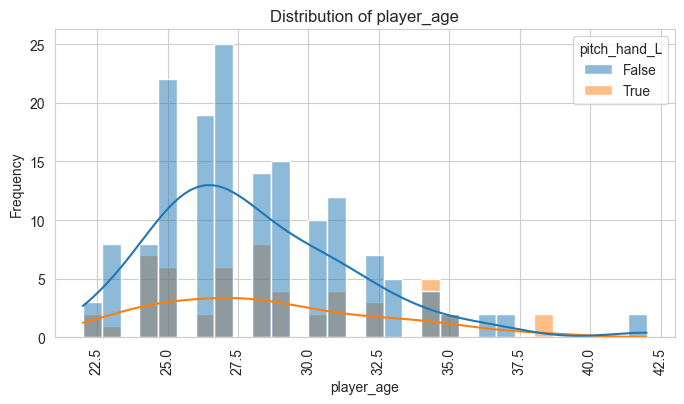

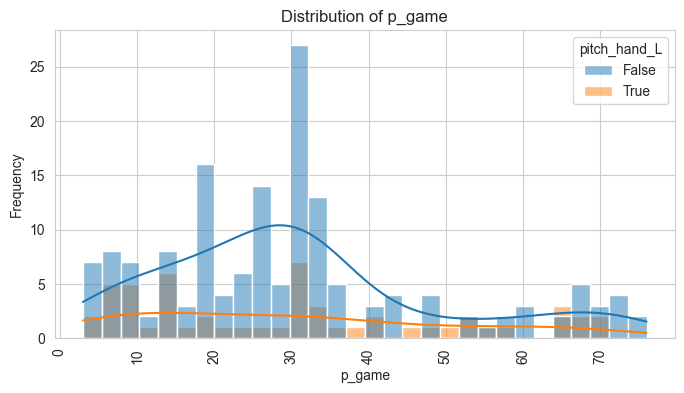

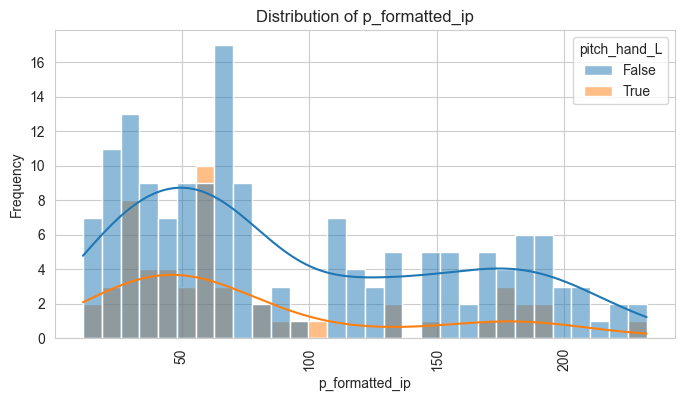

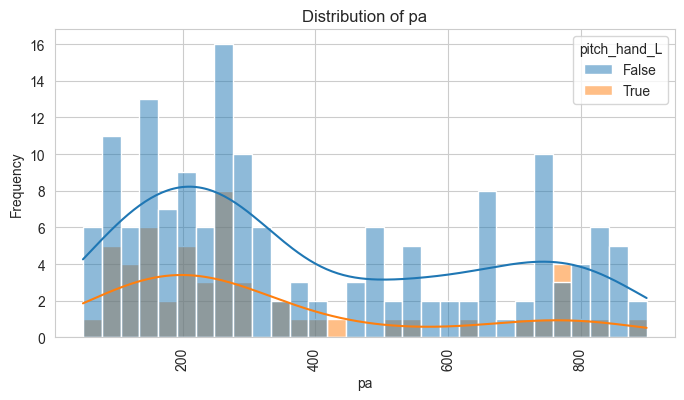

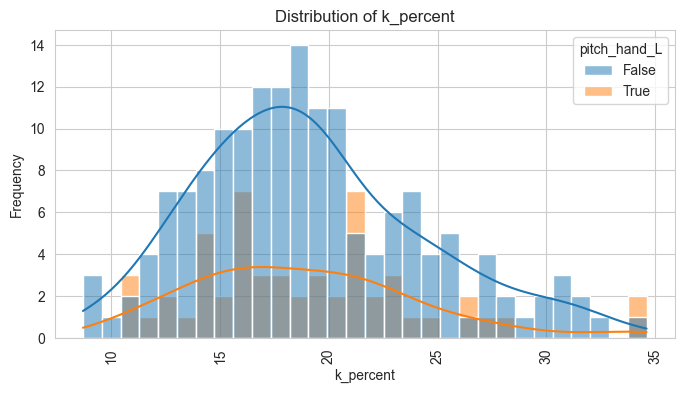

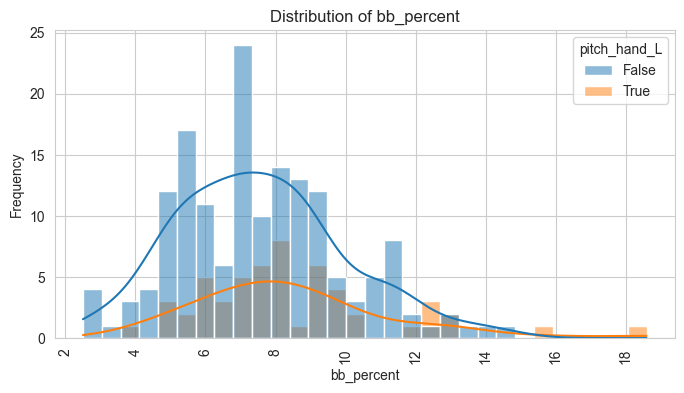

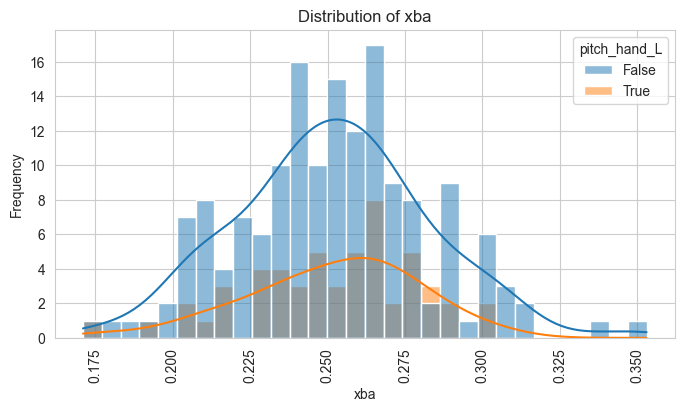

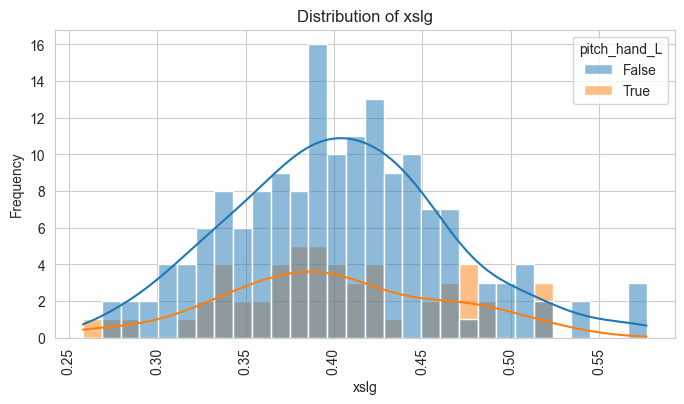

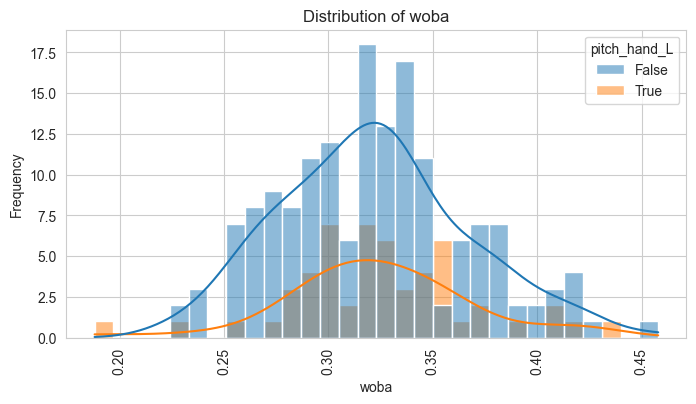

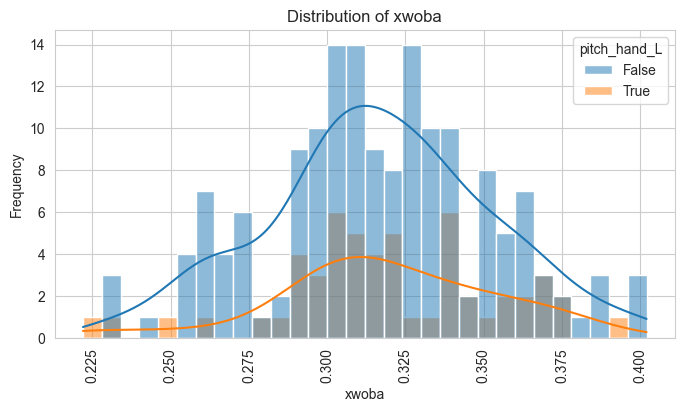

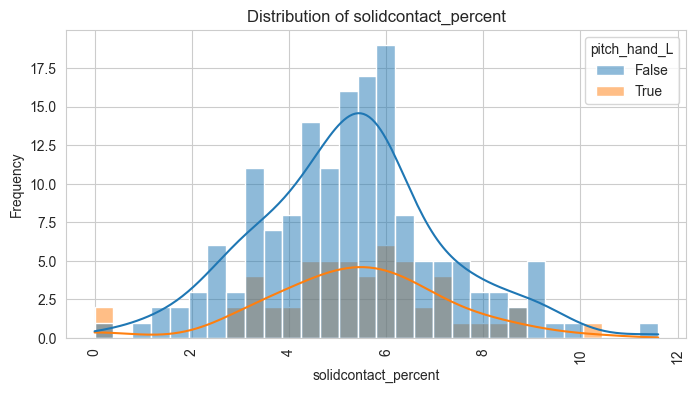

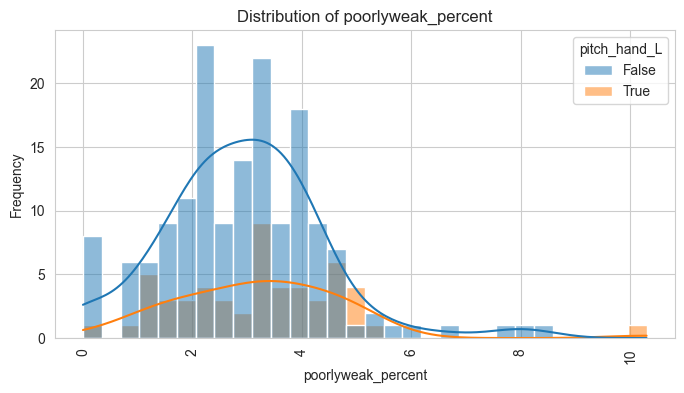

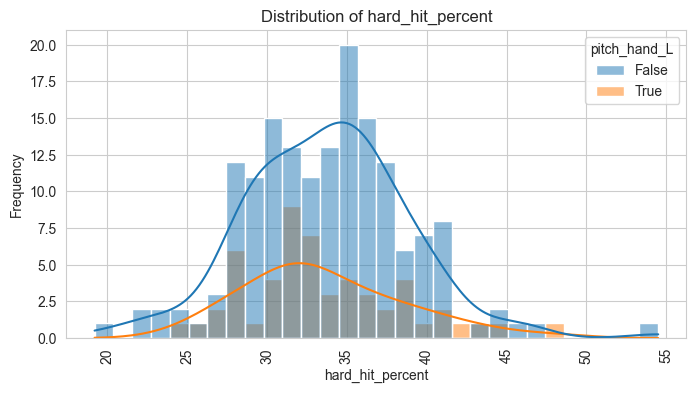

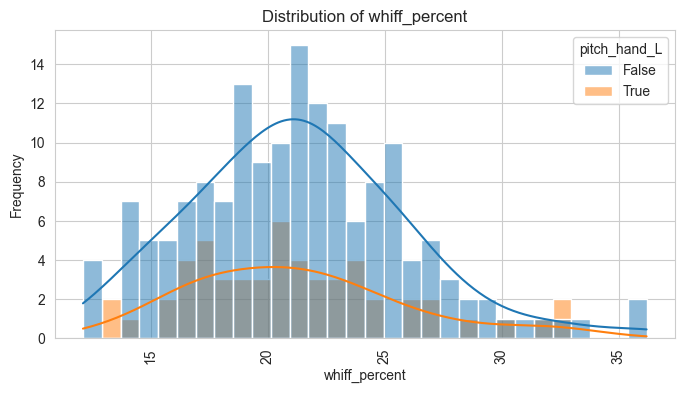

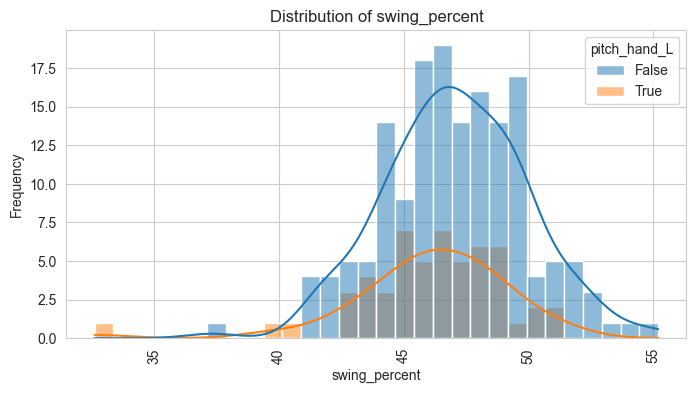

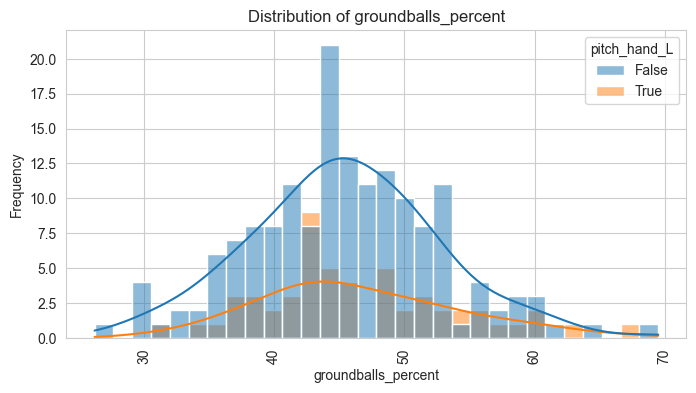

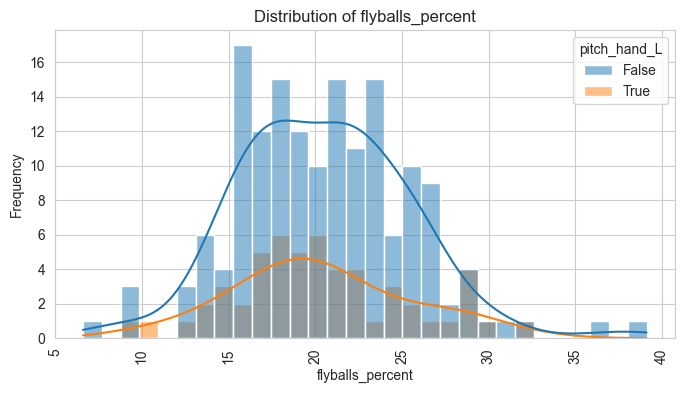

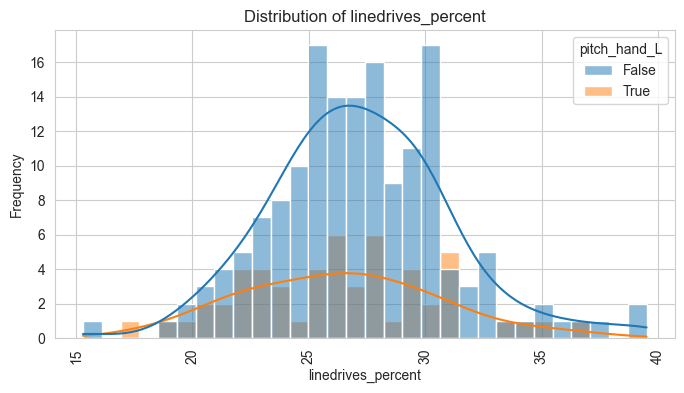

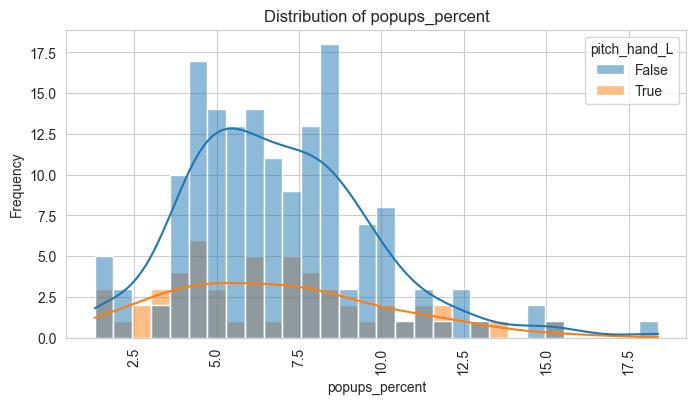

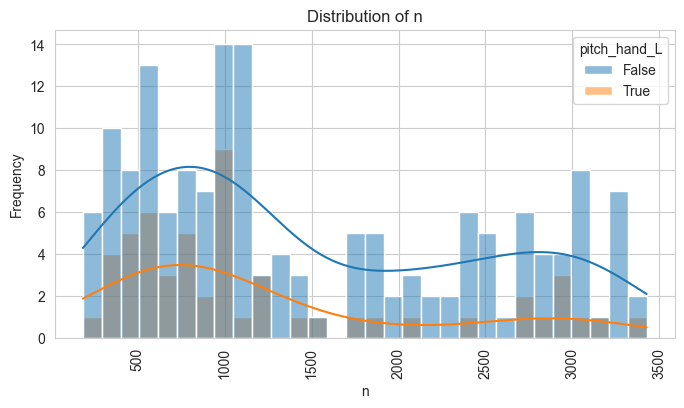

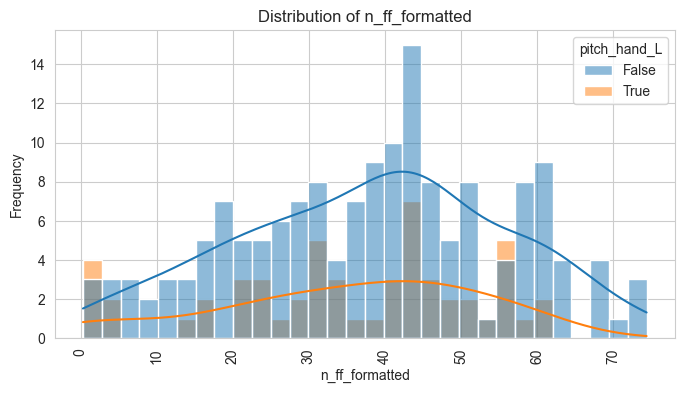

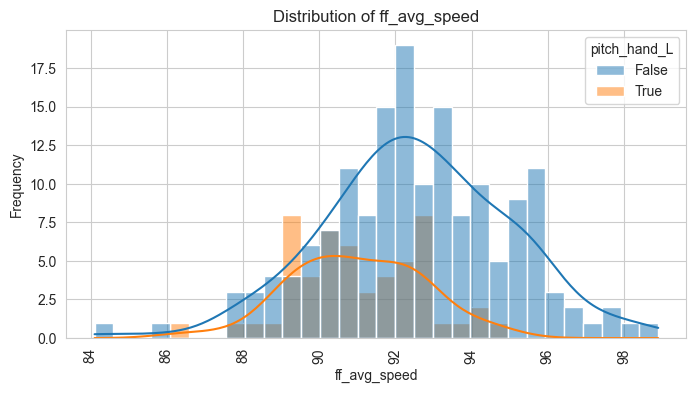

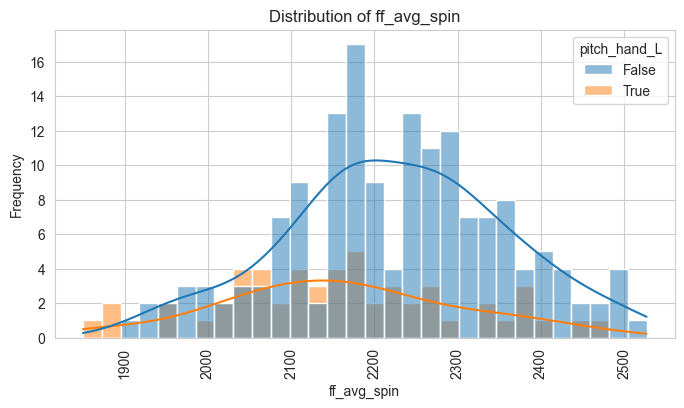

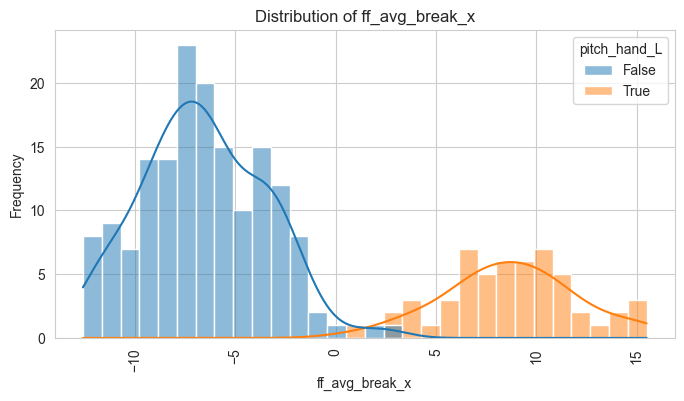

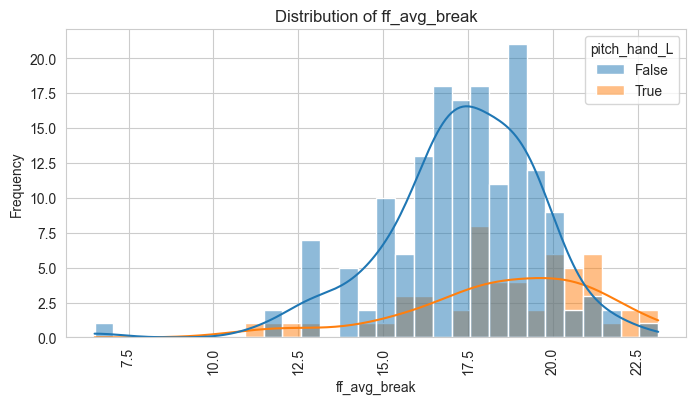

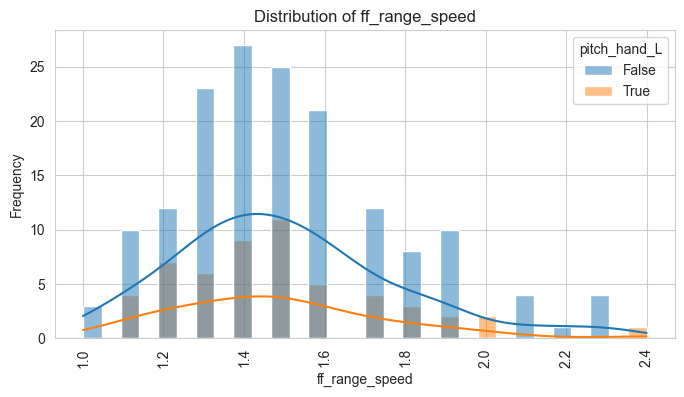

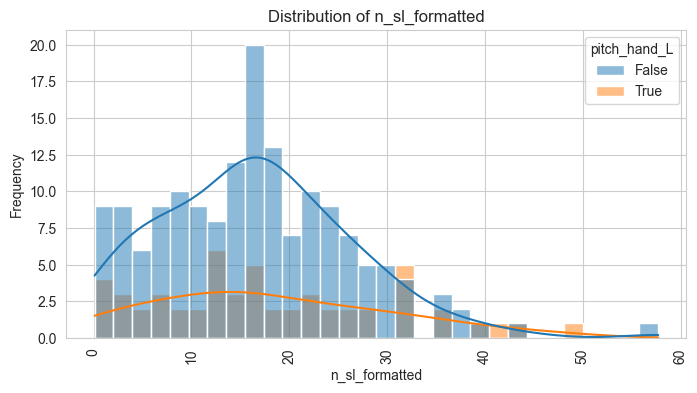

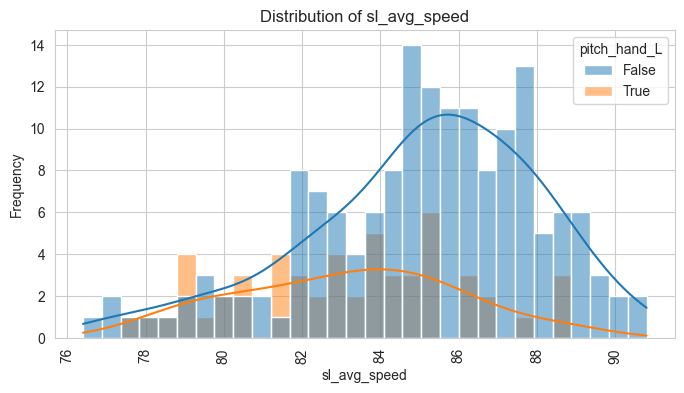

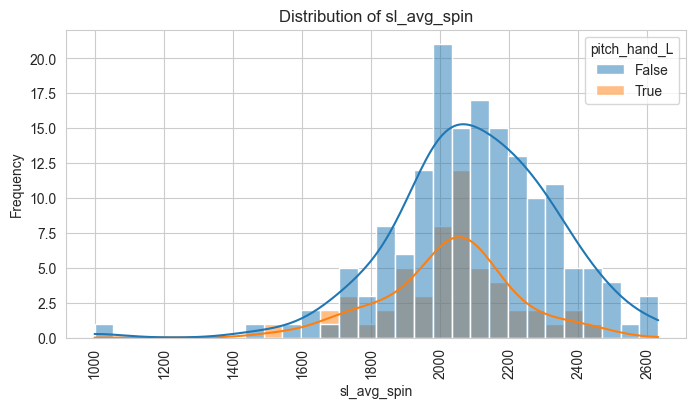

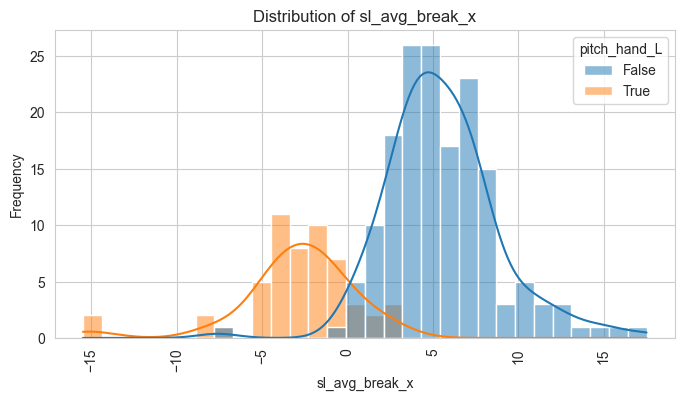

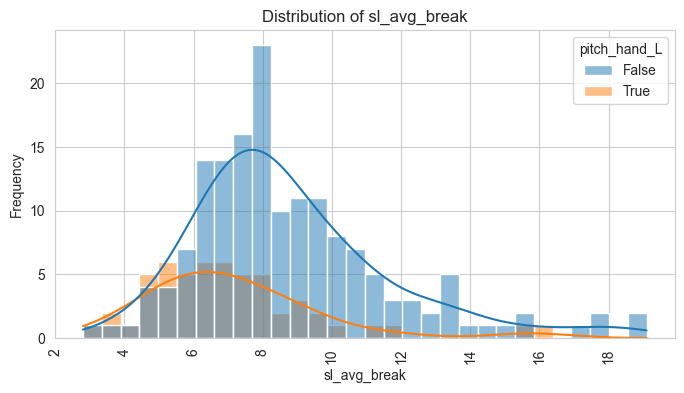

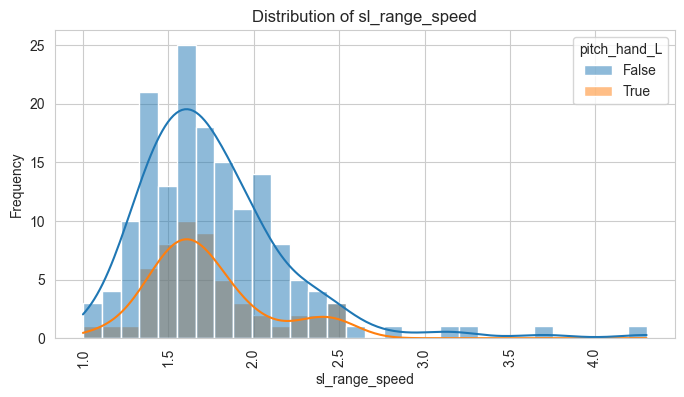

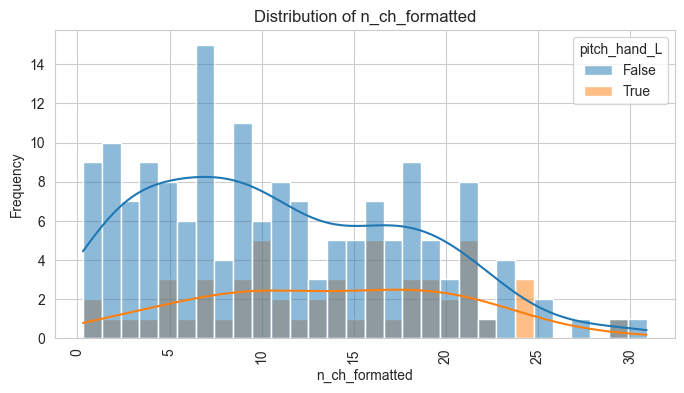

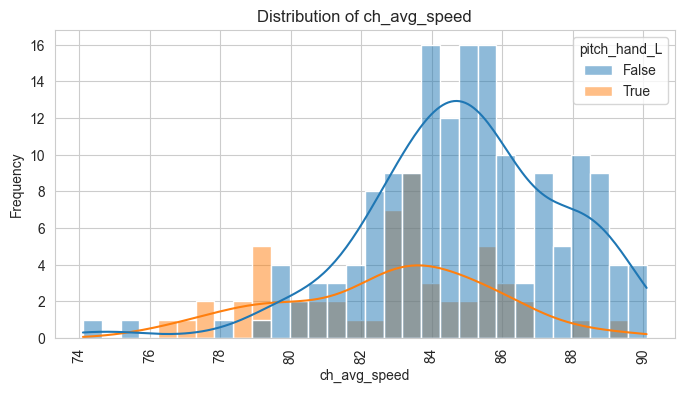

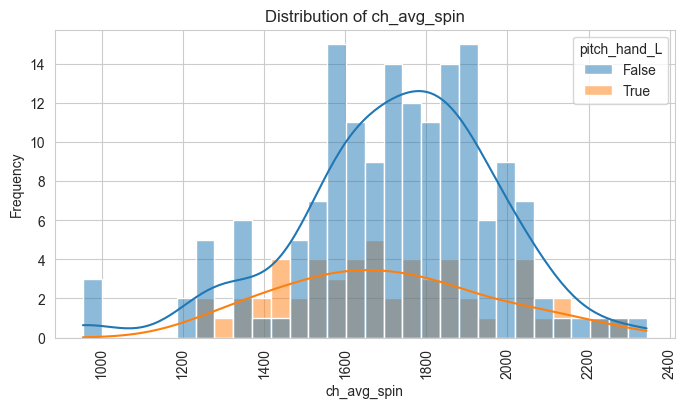

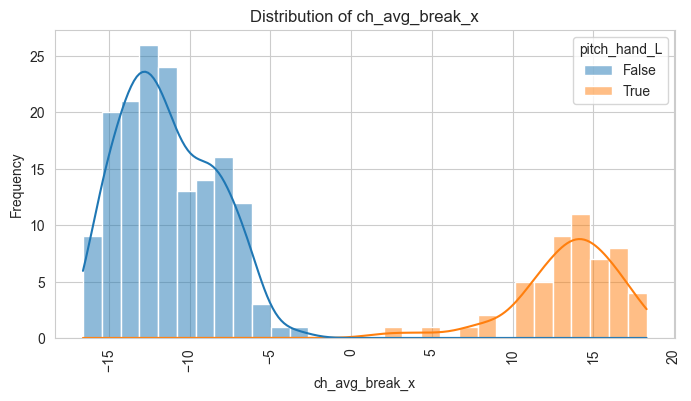

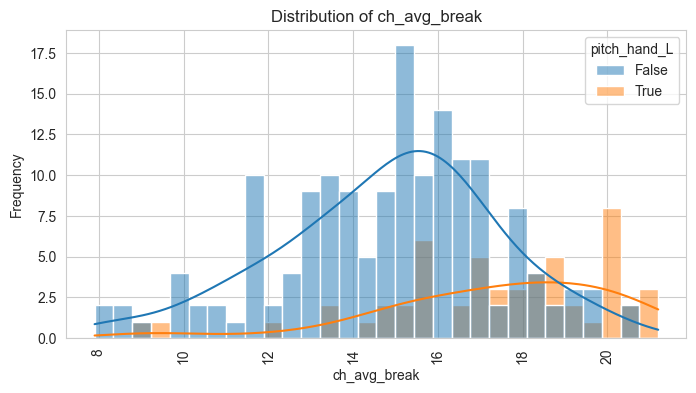

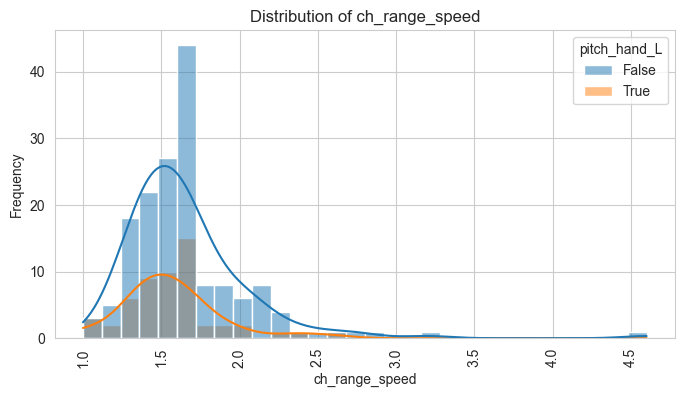

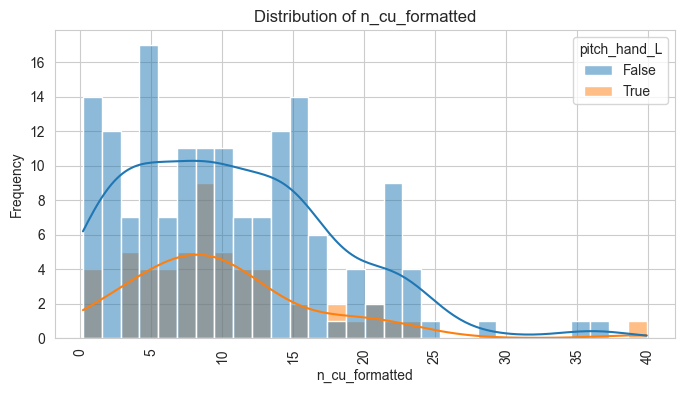

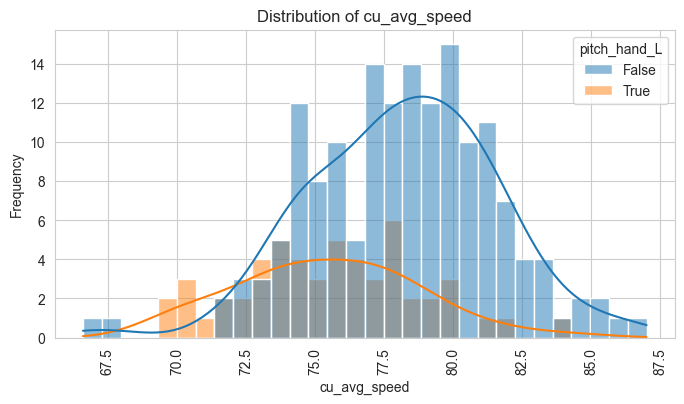

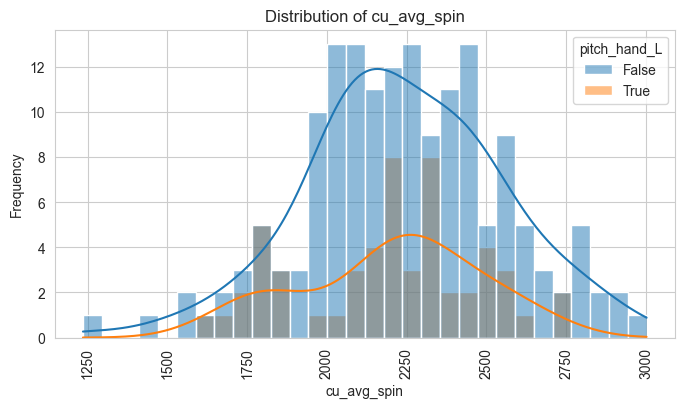

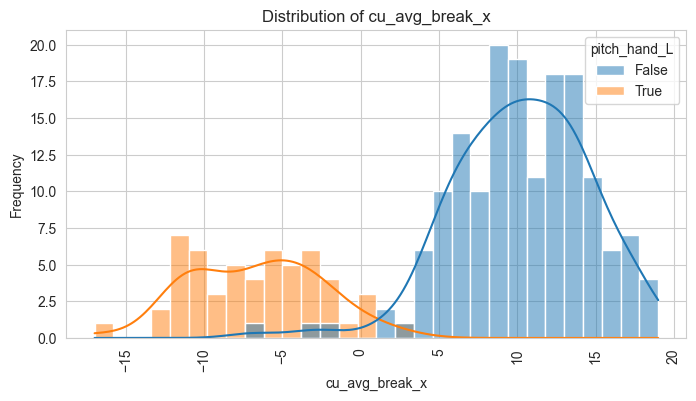

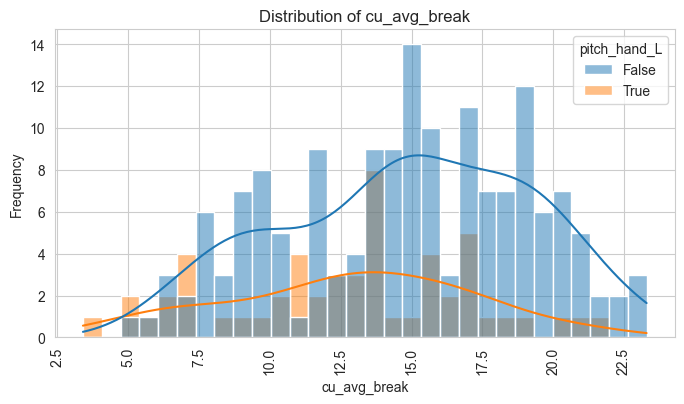

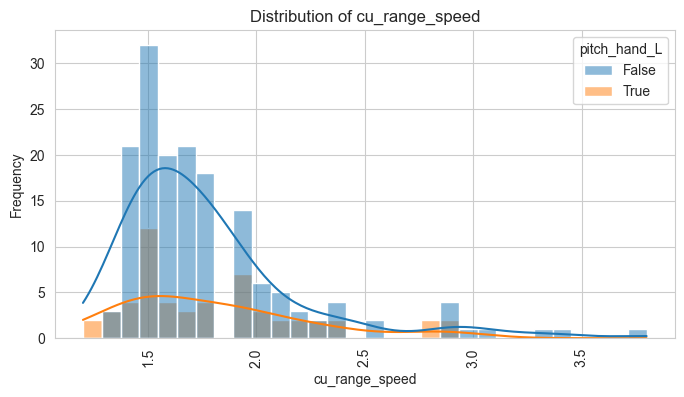

In [45]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data= data_2015_clean, x=col, hue=target, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

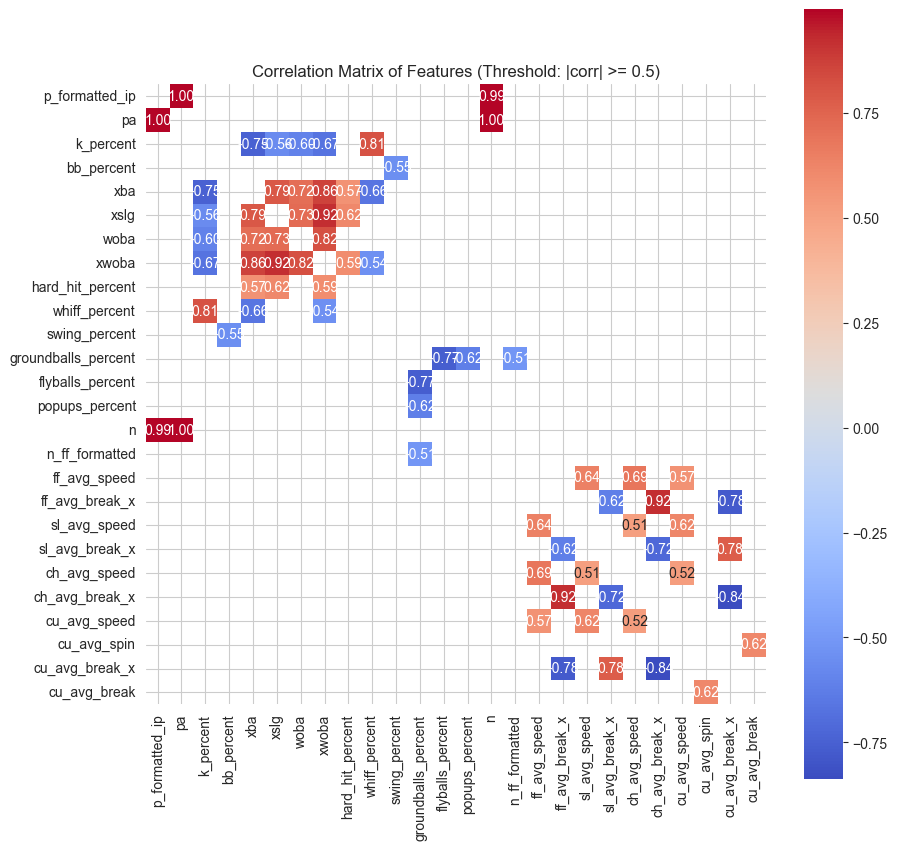

In [ ]:
# Compute the correlation matrix
corr = data_2015_clean[numeric_features].corr()

# Set the correlation threshold (e.g., 0.5)
threshold = 0.5

# Filter the correlation matrix to keep only important correlations
filtered_corr = corr[(corr.abs() >= threshold) & (corr != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Generate a heatmap for filtered correlations
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title(f'Correlation Matrix of Features (Threshold: |corr| >= {threshold})')
plt.show()


In [ ]:
data_2015_clean['pitch_hand_L'].value_counts()

pitch_hand_L
False    160
True      54
Name: count, dtype: int64

In [65]:
data_2015_clean[target].value_counts()

last_name    first_name  player_id  player_age  p_game  p_formatted_ip  pa   k_percent  bb_percent  xba    xslg   woba   xwoba  solidcontact_percent  poorlyweak_percent  hard_hit_percent  whiff_percent  swing_percent  groundballs_percent  flyballs_percent  linedrives_percent  popups_percent  pitch_hand_L  n     n_ff_formatted  ff_avg_speed  ff_avg_spin  ff_avg_break_x  ff_avg_break  ff_range_speed  n_sl_formatted  sl_avg_speed  sl_avg_spin  sl_avg_break_x  sl_avg_break  sl_range_speed  n_ch_formatted  ch_avg_speed  ch_avg_spin  ch_avg_break_x  ch_avg_break  ch_range_speed  n_cu_formatted  cu_avg_speed  cu_avg_spin  cu_avg_break_x  cu_avg_break  cu_range_speed
alvarez      jose        501625     26          64      67.0            283  20.8       8.1         0.229  0.334  0.281  0.283  6.1                   5.1                 27.6              24.6           47.7           51.5                 17.3              27.6                3.6             True          999   30.7            91.

In [66]:
data_2015_clean[target]

,last_name,first_name,player_id,player_age,p_game,p_formatted_ip,pa,k_percent,bb_percent,xba,...,ch_avg_spin,ch_avg_break_x,ch_avg_break,ch_range_speed,n_cu_formatted,cu_avg_speed,cu_avg_spin,cu_avg_break_x,cu_avg_break,cu_range_speed
7,nolin,sean,543594,25,6,29.0,134,11.2,9.0,0.263,...,1601,11.9,17.6,2.3,11.8,74.3,1816,-2.8,11.9,2.2
8,krol,ian,571871,24,33,28.0,129,20.2,13.2,0.216,...,1814,16.2,20.2,1.6,9.0,77.8,2338,-7.5,12.3,1.8
10,anderson,brett,474463,27,31,180.1,750,15.5,6.1,0.241,...,1544,13.5,15.7,1.4,12.1,76.3,2302,-5.9,16.6,1.4
15,nuño,vidal,573064,27,35,89.0,376,21.5,5.9,0.231,...,1615,12.6,15.6,1.7,8.2,79.6,2312,-7.7,10.5,2.0
19,hand,brad,543272,25,38,93.1,408,16.4,7.8,0.277,...,2138,12.8,17.4,1.3,12.5,78.9,2485,-10.0,11.6,1.9
41,gilmartin,sean,543219,25,50,57.1,235,23.0,7.7,0.214,...,1453,11.4,16.9,1.4,6.5,69.7,2285,-11.2,16.8,1.5
44,cooney,tim,608641,24,6,31.1,130,22.3,7.7,0.262,...,2069,14.6,20.0,1.3,20.1,74.8,2171,-10.5,16.7,1.5
51,banuelos,manny,544365,24,7,26.1,121,15.7,9.9,0.292,...,1427,14.1,15.3,1.3,11.7,75.2,2232,-12.3,13.8,1.6
53,holland,derek,502706,28,10,58.2,245,16.7,6.9,0.286,...,2028,13.6,20.9,1.8,12.7,77.2,1621,-2.1,4.8,1.5
67,russell,james,460701,29,49,34.0,148,13.5,6.1,0.269,...,1804,8.5,16.6,1.4,10.4,76.0,2201,-7.5,10.3,1.3


In [ ]:
data_2015_clean[target] = data_2015_clean['pitch_hand_L']
# data_2015_clean[target].value_counts()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data_2015_clean[numeric_features + categorical_features], data_2015_clean[target], test_size=0.2, random_state=42)


ValueError: Unable to coerce to Series, length must be 3: given 44